In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

In [2]:
data = pd.read_csv('Train.csv', index_col = "ID")
data.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
data.shape

(8068, 10)

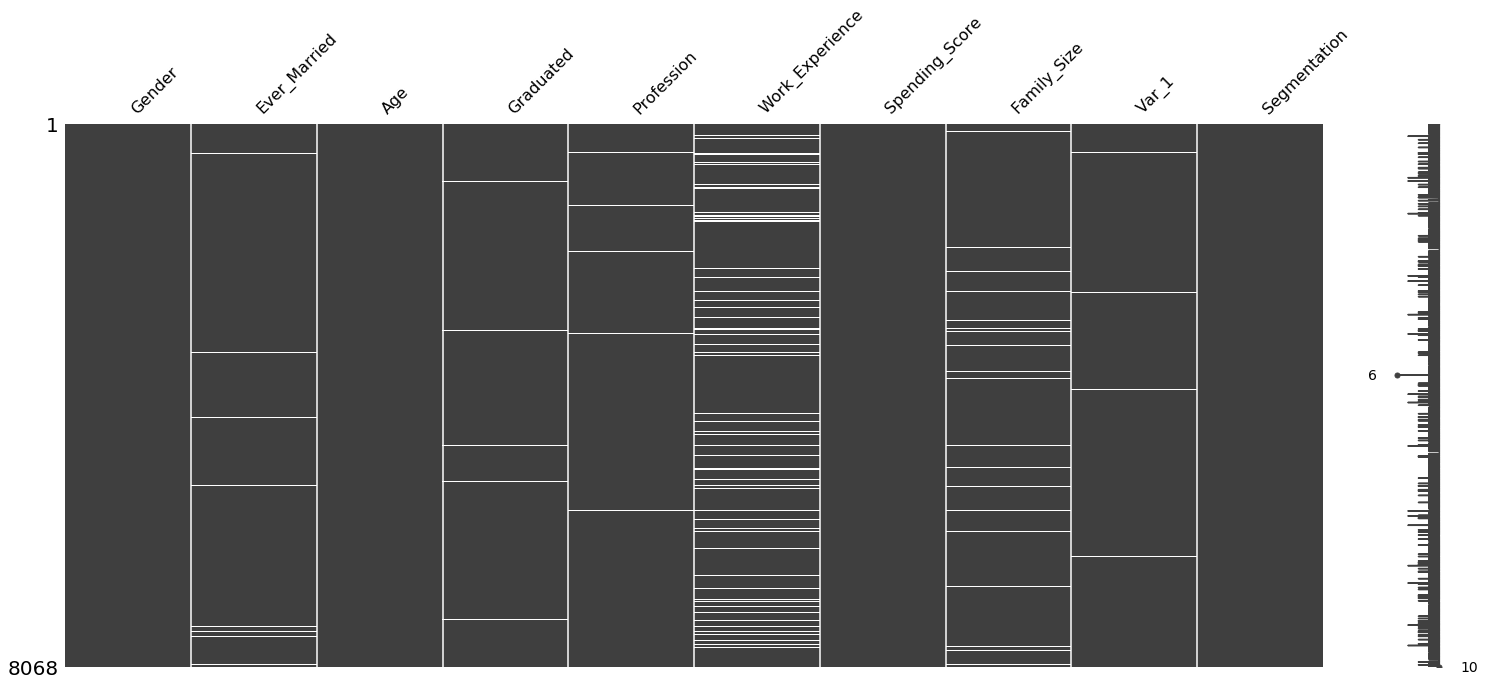

In [4]:
msno.matrix(data)

In [5]:
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
data.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [7]:
corr_matrix=data.corr()
corr_matrix


,Age,Work_Experience,Family_Size
Age,1.000000,-0.190789,-0.280517
Work_Experience,-0.190789,1.000000,-0.063234
Family_Size,-0.280517,-0.063234,1.000000


In [8]:
data.nunique()

Gender              2
Ever_Married        2
Age                67
Graduated           2
Profession          9
Work_Experience    15
Spending_Score      3
Family_Size         9
Var_1               7
Segmentation        4
dtype: int64

In [9]:
X1 = 'Gender'
Type1 = data[X1].value_counts().index
f = data[X1].value_counts()

for k in Type1:
   print(k, data[data[X1] == k][['Ever_Married']].isnull().sum()/f[k])

Male Ever_Married    0.014489
dtype: float64
Female Ever_Married    0.020816
dtype: float64


In [10]:
X1 = 'Gender'
Type1 = data[X1].value_counts().index
f = data[X1].value_counts()

for k in Type1:
   print(k, data[data[X1] == k][['Graduated', 'Profession', 'Family_Size']].isnull().sum()/f[k])

Male Graduated      0.010414
Profession     0.014716
Family_Size    0.035771
dtype: float64
Female Graduated      0.008765
Profession     0.016160
Family_Size    0.048480
dtype: float64


In [11]:
data['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [12]:
data.groupby(['Profession'])['Spending_Score'].value_counts()

Profession     Spending_Score
Artist         Low               1263
               Average           1011
               High               242
Doctor         Low                480
               Average            177
               High                31
Engineer       Low                418
               Average            221
               High                60
Entertainment  Low                584
               Average            319
               High                46
Executive      High               398
               Low                126
               Average             75
Healthcare     Low               1245
               High                45
               Average             42
Homemaker      Low                160
               Average             60
               High                26
Lawyer         High               324
               Low                281
               Average             18
Marketing      Low                242
               High 

In [13]:
data['Ever_Married'].fillna(data['Ever_Married'].mode()[0],inplace=True)
data['Graduated'].fillna(data['Graduated'].mode()[0],inplace=True)
data['Profession'].fillna(data['Profession'].mode()[0],inplace=True)
data['Work_Experience'].fillna(data['Work_Experience'].mode()[0],inplace=True)
data['Family_Size'].fillna(data['Family_Size'].mode()[0],inplace=True)
data['Var_1'].fillna(data['Var_1'].mode()[0],inplace=True)

In [14]:
data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [15]:
data.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [16]:
data=pd.get_dummies(data, columns =['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'], drop_first=True)

In [17]:
data.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
ID,,,,,,,,,,,,,,,,,,,,,
462809,22,1.0,4.0,D,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
462643,38,1.0,3.0,A,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
466315,67,1.0,1.0,B,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
461735,67,0.0,2.0,B,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
462669,40,1.0,6.0,A,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [18]:
data.dtypes

Age                           int64
Work_Experience             float64
Family_Size                 float64
Segmentation                 object
Gender_Male                   uint8
Ever_Married_Yes              uint8
Graduated_Yes                 uint8
Profession_Doctor             uint8
Profession_Engineer           uint8
Profession_Entertainment      uint8
Profession_Executive          uint8
Profession_Healthcare         uint8
Profession_Homemaker          uint8
Profession_Lawyer             uint8
Profession_Marketing          uint8
Spending_Score_High           uint8
Spending_Score_Low            uint8
Var_1_Cat_2                   uint8
Var_1_Cat_3                   uint8
Var_1_Cat_4                   uint8
Var_1_Cat_5                   uint8
Var_1_Cat_6                   uint8
Var_1_Cat_7                   uint8
dtype: object

In [19]:
data.shape

(8068, 23)

In [21]:
dict = {'A':0, 'B':1,'C': 2, 'D': 3}
data['Segmentation'] = data['Segmentation'].map(dict)

In [22]:
data.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
ID,,,,,,,,,,,,,,,,,,,,,
462809,22,1.0,4.0,3,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
462643,38,1.0,3.0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
466315,67,1.0,1.0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
461735,67,0.0,2.0,1,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
462669,40,1.0,6.0,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('Segmentation',axis=1),data['Segmentation'] , test_size=0.3, random_state=42)

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


n_estimators = [int(x) for x in np.linspace(10, 2000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

classifier = RandomForestClassifier()
random = RandomizedSearchCV(classifier,params)

In [43]:
reg = random.fit(X_train, y_train)

In [44]:
print(random.best_params_)
print(random.score(X_train, y_train))
print(random.score(X_test, y_test))

{'n_estimators': 1336, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
0.6182043562953781
0.5291201982651796


In [45]:
test = pd.read_csv('Test.csv',index_col='ID')
test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,,,,,,,,,
458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [46]:
test['Ever_Married'].fillna(test['Ever_Married'].mode()[0],inplace=True)
test['Graduated'].fillna(test['Graduated'].mode()[0],inplace=True)
test['Profession'].fillna(test['Profession'].mode()[0],inplace=True)
test['Work_Experience'].fillna(test['Work_Experience'].mode()[0],inplace=True)
test['Family_Size'].fillna(test['Family_Size'].mode()[0],inplace=True)
test['Var_1'].fillna(test['Var_1'].mode()[0],inplace=True)

In [47]:
test.dtypes


Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

In [48]:
test=pd.get_dummies(test, drop_first = True)
test.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
ID,,,,,,,,,,,,,,,,,,,,,
458989,36,0.0,1.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
458994,37,8.0,4.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
458996,69,0.0,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
459000,59,11.0,2.0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
459001,19,1.0,4.0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [49]:
fin = random.predict(test)
fin.shape


(2627,)

In [50]:
fin = pd.DataFrame(fin, columns = ['Segmentation'], index=test.index)

In [51]:
fin.to_csv('Values.csv')

In [52]:
fin.shape

(2627, 1)

In [53]:
fin.head()

,Segmentation
ID,
458989,0
458994,2
458996,0
459000,2
459001,3


In [54]:
dict = {0:'A', 1:'B',2: 'C', 3: 'D'}
fin['Segmentation'] = fin['Segmentation'].map(dict)

In [55]:
fin.head()

,Segmentation
ID,
458989,A
458994,C
458996,A
459000,C
459001,D


In [56]:
fin.isnull().sum()

Segmentation    0
dtype: int64